In [4]:
#1.	Tải dữ liệu diemthidaihoc.csv và hiển thị các dòng dữ liệu
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df = pd.read_csv('dulieuxettuyendaihoc.csv', header = 0, delimiter= ',', encoding= 'utf-8')
df
df.rename(columns={'TOANLOGICPHANTICH': 'LOGIC',
'GIAIQUYETVANDE': 'UNGXU',
'DINHHUONGNGHENGHIEP': 'HUONGNGHIEP'
}, inplace=True)

FileNotFoundError: [Errno 2] No such file or directory: 'dulieuxettuyendaihoc.csv'

In [ ]:
# cắt dữ liệu cần thiết
df = df[['T1','T2','T3','T4','T5','T6','GT','LOGIC']]
df

,T1,T2,T3,T4,T5,T6,GT,LOGIC
0,7.2,8.4,7.4,7.2,7.4,6.9,F,3.25
1,5.4,6.3,4.3,4.9,3.0,4.0,M,4.00
2,5.6,5.0,2.8,6.1,4.8,5.7,M,6.75
3,6.6,5.1,5.9,4.1,6.1,7.4,M,4.25
4,6.0,5.4,7.6,4.4,6.8,8.0,M,4.50
...,...,...,...,...,...,...,...,...
95,8.6,8.9,7.7,6.7,7.9,6.6,F,1.50
96,3.7,4.1,3.1,3.4,5.5,5.7,F,3.75
97,8.8,9.5,9.5,8.5,9.0,8.5,M,8.00
98,2.7,2.8,6.2,5.2,4.1,4.3,M,3.50


In [ ]:
# 2.Tiến hành EDA dữ liệu, ví dụ: Hãy thống kê các độ đo cơ bản của dữ liệu và nhận xét
df.describe()

,T1,T2,T3,T4,T5,T6,LOGIC
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.0000,100.000000
mean,5.946000,6.374000,6.383000,6.291000,6.717000,6.9370,4.255000
std,1.608338,1.561443,1.574484,1.469563,1.478059,1.3632,1.060053
min,2.400000,2.800000,2.300000,2.900000,3.000000,3.7000,1.500000
25%,5.000000,5.300000,5.175000,5.300000,5.800000,6.0000,3.500000
50%,5.850000,6.250000,6.650000,6.350000,6.800000,7.1000,4.125000
75%,7.200000,7.525000,7.500000,7.600000,7.800000,8.0000,4.750000
max,9.300000,9.600000,9.500000,9.400000,9.500000,9.5000,8.000000


In [ ]:
from sklearn.preprocessing import OneHotEncoder
# OneHotEncoder
encoder = OneHotEncoder()
GT_encoded = encoder.fit_transform(df[['GT']]).toarray()
# Tạo DataFrame mới
GT_encoded_df = pd.DataFrame(GT_encoded, columns=['female', 'male'])
# Kết hợp DataFrame mới với DataFrame ban đầu
df = pd.concat([df, GT_encoded_df], axis=1)
# Xóa cột 'GT' ban đầu
df = df.drop('GT', axis=1)
# In kết quả
print(df)

     T1   T2   T3   T4   T5   T6  LOGIC  female  male
0   7.2  8.4  7.4  7.2  7.4  6.9   3.25     1.0   0.0
1   5.4  6.3  4.3  4.9  3.0  4.0   4.00     0.0   1.0
2   5.6  5.0  2.8  6.1  4.8  5.7   6.75     0.0   1.0
3   6.6  5.1  5.9  4.1  6.1  7.4   4.25     0.0   1.0
4   6.0  5.4  7.6  4.4  6.8  8.0   4.50     0.0   1.0
..  ...  ...  ...  ...  ...  ...    ...     ...   ...
95  8.6  8.9  7.7  6.7  7.9  6.6   1.50     1.0   0.0
96  3.7  4.1  3.1  3.4  5.5  5.7   3.75     1.0   0.0
97  8.8  9.5  9.5  8.5  9.0  8.5   8.00     0.0   1.0
98  2.7  2.8  6.2  5.2  4.1  4.3   3.50     0.0   1.0
99  4.1  4.4  6.0  4.3  5.6  5.1   2.50     0.0   1.0

[100 rows x 9 columns]


In [ ]:
# tập dữ liệu
X = df[['T1','T2','T3','T4','T5','T6','female','male']].values # input
y = df[['LOGIC']].values # output

# chia tách ra training(guấn luyện) và testing(kiểm thử)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=16)


In [ ]:
# đây là X_train dạng array. Muốn bình phương nó lên phải chuyển sang dạng df
X_train

array([[3.7, 4.1, 3.1, 3.4, 5.5, 5.7, 1. , 0. ],
       [9.3, 9.6, 7.1, 8.5, 8.5, 7.8, 0. , 1. ],
       [8.1, 8.8, 9.2, 8.8, 8.9, 8.5, 0. , 1. ],
       [4.9, 6.1, 2.5, 6.2, 4.9, 6.5, 0. , 1. ],
       [4.6, 7.2, 7.6, 6.2, 8. , 7.2, 0. , 1. ],
       [5.7, 3.9, 5.7, 4.6, 6.8, 7.3, 0. , 1. ],
       [4.3, 5.3, 7.3, 7.7, 7.4, 7.1, 0. , 1. ],
       [7.9, 8.2, 8.1, 6.9, 8. , 8.1, 0. , 1. ],
       [5.2, 6.3, 7.8, 7.6, 6.2, 7.3, 1. , 0. ],
       [6.3, 6.3, 5.2, 6.1, 6. , 5.7, 0. , 1. ],
       [6.9, 5.4, 5.3, 5.3, 7.2, 7.1, 1. , 0. ],
       [6.5, 5.3, 6.1, 5.7, 7.1, 6.9, 0. , 1. ],
       [4.4, 4.4, 5.1, 5.6, 5.8, 5.8, 0. , 1. ],
       [5.6, 5. , 2.8, 6.1, 4.8, 5.7, 0. , 1. ],
       [5.8, 6.4, 7.3, 7.1, 7.3, 6.7, 0. , 1. ],
       [8.2, 6.4, 6.1, 5.8, 7.1, 8.9, 1. , 0. ],
       [7.3, 7.5, 8. , 7.7, 7.8, 8.1, 0. , 1. ],
       [7.3, 5.9, 7.1, 7.7, 7.9, 6.6, 0. , 1. ],
       [8.1, 4.4, 5. , 2.9, 5.8, 5.6, 1. , 0. ],
       [5. , 5.5, 2.3, 4.1, 3.4, 4.1, 1. , 0. ],
       [6. , 7.3, 7.

In [ ]:
import pandas as pd
# Tạo 1 biến dfXtrain để chuyển X_train thành dataframe
dfXtrain = pd.DataFrame(X_train) 

# Bình phương DataFrame
dfXtrain_squared = dfXtrain.apply(lambda x: x**2)



In [ ]:
# In DataFrame sau khi bình phương
print(dfXtrain_squared)

       T1     T2     T3     T4     T5     T6  Female  Male
0   13.69  16.81   9.61  11.56  30.25  32.49     1.0   0.0
1   86.49  92.16  50.41  72.25  72.25  60.84     0.0   1.0
2   65.61  77.44  84.64  77.44  79.21  72.25     0.0   1.0
3   24.01  37.21   6.25  38.44  24.01  42.25     0.0   1.0
4   21.16  51.84  57.76  38.44  64.00  51.84     0.0   1.0
..    ...    ...    ...    ...    ...    ...     ...   ...
75   6.76  14.44  34.81  46.24  39.69  64.00     0.0   1.0
76  53.29  65.61  67.24  62.41  70.56  65.61     0.0   1.0
77   9.00  12.25  14.44  30.25  25.00  26.01     0.0   1.0
78  36.00  38.44  26.01  26.01  12.25  31.36     0.0   1.0
79  68.89  67.24  60.84  59.29  77.44  72.25     1.0   0.0

[80 rows x 8 columns]


array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>],
       [<AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>]], dtype=object)

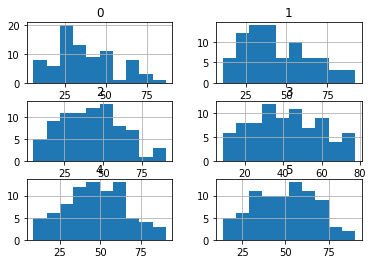

In [ ]:
# dòng đầu tiên là lấy toàn bộ các dòng, dòng thứ 2 là lấy cột từ 1 - 5
# Vẽ biểu đồ phân phối
dfXtrain_squared.iloc[:, 0:6].hist()

In [ ]:
dfXtrainMinMax = pd.DataFrame(dfXtrain_squared) 
dfXtrainMinMax

,T1,T2,T3,T4,T5,T6,Female,Male
0,13.69,16.81,9.61,11.56,30.25,32.49,1.0,0.0
1,86.49,92.16,50.41,72.25,72.25,60.84,0.0,1.0
2,65.61,77.44,84.64,77.44,79.21,72.25,0.0,1.0
3,24.01,37.21,6.25,38.44,24.01,42.25,0.0,1.0
4,21.16,51.84,57.76,38.44,64.00,51.84,0.0,1.0
...,...,...,...,...,...,...,...,...
75,6.76,14.44,34.81,46.24,39.69,64.00,0.0,1.0
76,53.29,65.61,67.24,62.41,70.56,65.61,0.0,1.0
77,9.00,12.25,14.44,30.25,25.00,26.01,0.0,1.0
78,36.00,38.44,26.01,26.01,12.25,31.36,0.0,1.0


In [ ]:
# đặt tên cho dataframe
dfXtrainMinMax.columns = ['T1', 'T2','T3','T4','T5','T6','Female','Male']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Scale cho Input
sc = MinMaxScaler()
dfXtrainMaxScale = sc.fit_transform(dfXtrainMinMax)

In [ ]:
dfXtrainMaxScale

array([[0.09822866, 0.07284361, 0.05084746, 0.04563233, 0.26153846,
        0.24555904, 1.        , 0.        ],
       [1.        , 1.        , 0.53107345, 0.9248153 , 0.77846154,
        0.61585684, 0.        , 1.        ],
       [0.74136009, 0.81887535, 0.93396893, 1.        , 0.86412308,
        0.76489028, 0.        , 1.        ],
       [0.22606218, 0.32385874, 0.01129944, 0.43502825, 0.18473846,
        0.37304075, 0.        , 1.        ],
       [0.19075932, 0.50387597, 0.61758475, 0.43502825, 0.67692308,
        0.49830199, 0.        , 1.        ],
       [0.33110368, 0.05315615, 0.32015066, 0.1847023 , 0.45833846,
        0.51724138, 0.        , 1.        ],
       [0.15768611, 0.21164021, 0.56497175, 0.73707084, 0.5632    ,
        0.47962382, 0.        , 1.        ],
       [0.70172179, 0.69336779, 0.70998117, 0.56786904, 0.67692308,
        0.67816092, 0.        , 1.        ],
       [0.2635947 , 0.35437431, 0.6538371 , 0.71490656, 0.36233846,
        0.51724138, 1.      

In [ ]:
# chuyển thành dataframe
dfXtrainMaxScale = pd.DataFrame(dfXtrainMaxScale)
dfXtrainMaxScale

,0,1,2,3,4,5,6,7
0,0.098229,0.072844,0.050847,0.045632,0.261538,0.245559,1.0,0.0
1,1.000000,1.000000,0.531073,0.924815,0.778462,0.615857,0.0,1.0
2,0.741360,0.818875,0.933969,1.000000,0.864123,0.764890,0.0,1.0
3,0.226062,0.323859,0.011299,0.435028,0.184738,0.373041,0.0,1.0
4,0.190759,0.503876,0.617585,0.435028,0.676923,0.498302,0.0,1.0
...,...,...,...,...,...,...,...,...
75,0.012387,0.043682,0.347458,0.548023,0.377723,0.657132,0.0,1.0
76,0.588753,0.673311,0.729167,0.782269,0.757662,0.678161,0.0,1.0
77,0.040134,0.016734,0.107698,0.316384,0.196923,0.160920,0.0,1.0
78,0.374582,0.338993,0.243879,0.254962,0.040000,0.230799,0.0,1.0


In [ ]:
dfXtrainMaxScale.columns = ['T1', 'T2','T3','T4','T5','T6','Female','Male']

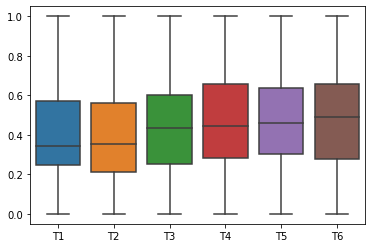

In [ ]:
import seaborn as sns
sns.boxplot(data = dfXtrainMaxScale[["T1","T2",'T3','T4','T5','T6']])
plt.show()

In [ ]:
# 8.Xây dựng mô hình hồi quy tuyến tính dự báo điểm LOGIC dựa trên các yếu tố điểm toán và giới tính
# trên tập train
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Sinh viên xác định các giá trị này ứng với gì
print(model.intercept_)
# for retrieving the slope(coefficent)
print(model.coef_)

[2.8980307]
[[ 0.06425398  0.0194425  -0.1364084  -0.05894131  0.00172894  0.30475377
  -0.26893886  0.26893886]]


In [ ]:
import numpy as np
from sklearn import metrics

y_test_pred = model.predict(X_test)

print('Score or R-squared',model.score(X_test,y_test))

print('Mean Absolute Error:',
metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error:',
np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

print('Mean Absolute Percentage Error:',
metrics.mean_absolute_percentage_error(y_test, y_test_pred))

Score or R-squared 0.13755600189812933
Mean Absolute Error: 0.666415347681449
Mean Squared Error: 0.8958109113305386
Mean Absolute Percentage Error: 0.18957387376048804


In [ ]:
# Lưu mô hình xuống ổ đĩa 
import pickle
pickle.dump(model,open('model_linear_regressionCK.sav', 'wb'))

In [ ]:
# Zây dựng chươn trình nhập điểm từ bàn phím, hãy dự báo điểm thi t6
loaded_model = pickle.load(open('model_linear_regressionCK.sav','rb'))
vT1 = float(input('Nhập T1: '))
vT2 = float(input('Nhập T2: '))
vT3 = float(input('Nhập T3: '))
vT4 = float(input('Nhập T4: '))
vT5 = float(input('Nhập T5: '))
vT6 = float(input('Nhập T6: '))
vGT1 = float(input('Nhập VGT1: '))
vGT2 = float(input('Nhập VGT2: '))

prdicted_LOGIC = loaded_model.predict([[vT5,vT2,vT3,vT4,vT5,vT6,vGT1,vGT2]])

print(f'Dự báo điểm LOGIC là: {prdicted_LOGIC}')

Dự báo điểm LOGIC là: [[4.18772765]]


In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# # Giả sử dfXtrainMaxScale là mảng numpy của bạn
# dfXtrainMaxScale = np.array(dfXtrainMaxScale)

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Giả sử dfXtrainMaxScale là mảng numpy của bạn
# dfXtrainMaxScale = np.array(dfXtrainMaxScale)  # Chuyển đổi thành mảng numpy nếu chưa phải là mảng

# # Vẽ lịch sử của các cột
# for i in range(6):  # Giả sử bạn muốn vẽ lịch sử của 6 cột đầu tiên
#     plt.hist(dfXtrainMaxScale[:, i])
#     plt.title(f"Column {i+1} Histogram")
#     plt.show()
